In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

In [2]:
df = pd.read_excel('default_of_credit_card_clients.xls')

In [3]:
np.random.seed(seed=24)

In [4]:
random_integers = np.random.randint(low=1,high=5,size=100)


In [5]:
is_equal_to_3 = random_integers == 3


In [6]:
is_equal_to_3[:5]


array([ True, False, False, False, False])

In [7]:
sum(is_equal_to_3)


22

In [8]:
random_integers[is_equal_to_3]


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [9]:
id_counts = df['ID'].value_counts()
dupe_mask = id_counts == 2
dupe_mask[0:5]

63338f74-01be    True
3e60a98c-e520    True
33bf169b-258a    True
994330b6-eeec    True
a51dbaae-d88b    True
Name: ID, dtype: bool

In [10]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [11]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10) 


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5146,33bf169b-258a,330000,2,2,2,30,-1,-1,-1,-1,...,15387,5945,896,12500,865,15500,6000,896,0,1
5246,33bf169b-258a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21503,63338f74-01be,100000,2,2,2,24,0,0,0,0,...,69849,71240,72736,2398,2485,2532,2549,2643,3000,0
21603,63338f74-01be,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27364,3e60a98c-e520,50000,1,2,2,28,Not available,0,0,2,...,28999,29607,29285,1500,3500,0,1051,1100,1040,0
27464,3e60a98c-e520,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_zero_mask = df == 0


In [13]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)


315

In [14]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()


In [15]:
df_clean_1['ID'].nunique()


29685

In [16]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [17]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()


In [18]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
PAY_1    26664 non-null int64
PAY_2    26664 non-null int64
dtypes: int64(2)
memory usage: 624.9 KB


In [19]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [20]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

In [21]:
df_clean_2['EDUCATION_CAT'] = 'none'


In [22]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)


,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [23]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [24]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [25]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)
df_with_ohe.to_csv('cleaned_data.csv', index=False)


In [26]:
df = pd.read_csv('cleaned_data.csv')

In [27]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [28]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [29]:
df.shape

(26664, 30)

In [30]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [31]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [32]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

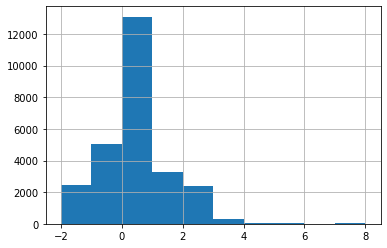

In [33]:
df[pay_feats[0]].hist()

In [34]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

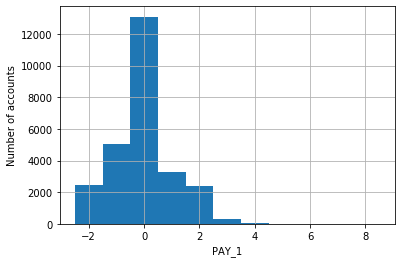

In [35]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E2E8CCE48>,
      dtype=object)

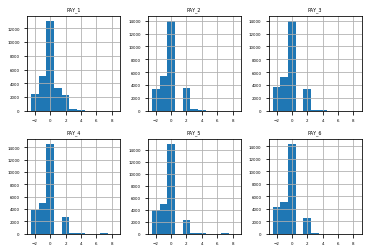

In [36]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

In [37]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


In [38]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [39]:
df =df.copy()
df=df.drop(['ID', 'EDUCATION_CAT', 'EDUCATION'], axis=1)

col_dict={'MARRIAGE':'MAR'}
for col, prefix in col_dict.items():
    dummies = pd.get_dummies(df[col], prefix=prefix)
    df=pd.concat([df, dummies], axis=1)
    df=df.drop(col, axis=1)

y = df['default payment next month']
X = df.drop('default payment next month', axis=1)

In [40]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'graduate school', 'high school',
       'others', 'university', 'MAR_1', 'MAR_2', 'MAR_3'],
      dtype='object')

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [42]:
X.head()

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,graduate school,high school,others,university,MAR_1,MAR_2,MAR_3
0,-1.139267,0.811301,-1.246871,1.790797,1.779853,-0.694097,-0.663579,-1.528864,-1.483576,-0.644999,...,-0.306282,-0.316347,-0.298146,-0.73862,-0.443344,-0.125584,1.067854,1.091147,-1.064000,-0.112628
1,-0.369071,0.811301,-1.030122,-0.871733,1.779853,0.139833,0.192677,0.238368,1.994057,-0.661717,...,-0.243610,-0.316347,-0.184736,-0.73862,-0.443344,-0.125584,1.067854,-0.916467,0.939849,-0.112628
2,-0.600130,0.811301,-0.163127,0.015777,0.111264,0.139833,0.192677,0.238368,0.255240,-0.301046,...,-0.243610,-0.251037,-0.014621,-0.73862,-0.443344,-0.125584,1.067854,-0.916467,0.939849,-0.112628
3,-0.908208,0.811301,0.161997,0.015777,0.111264,0.139833,0.192677,0.238368,0.255240,-0.059970,...,-0.237342,-0.246530,-0.241441,-0.73862,-0.443344,-0.125584,1.067854,1.091147,-1.064000,-0.112628
4,-0.908208,-1.232588,2.329485,-0.871733,0.111264,-0.694097,0.192677,0.238368,0.255240,-0.581114,...,0.257768,-0.271348,-0.259643,-0.73862,-0.443344,-0.125584,1.067854,1.091147,-1.064000,-0.112628


In [43]:
X.shape

(26664, 28)

In [44]:
y.shape

(26664,)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [46]:
X_train.shape, X_test.shape,  y_train.shape, y_test.shape

((18664, 28), (8000, 28), (18664,), (8000,))

In [47]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train, y_train)

C:\Users\sagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
model.score(X_test, y_test)

0.81475

In [49]:
from sklearn.metrics import confusion_matrix
predict=model.predict(X_test)
cf = confusion_matrix(y_test,predict, labels=[1,0])

In [50]:
cf

array([[ 430, 1319],
       [ 163, 6088]], dtype=int64)